In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#import dataset
original_data = pd.read_csv("spambase.csv")
original_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [13]:
#Describe Dataset
original_data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [14]:
#Data Preparation
original_data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

([array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([1., 0., 0.,

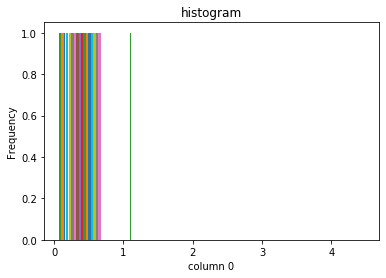

In [19]:
#Data Exploration
plt.title('histogram')
plt.xlabel('column 0')
plt.ylabel('Frequency')
plt.hist(original_data.iloc[:,[0]], bins = 6)